In [1]:
# Self Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y) # Not used anywhere for training or testing because this is an unsupervised algorithm.
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)

   CustomerID  A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0    15776156   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2   
1    15739548   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2   
2    15662854   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2   
3    15687688   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2   
4    15715750   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   

   A13   A14  Class  
0  100  1213      0  
1  160     1      0  
2  280     1      0  
3    0     1      1  
4   60   159      1  

Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+

In [12]:
# Training the SOM
from minisom import MiniSom
# x & y are the dimentions of the map
# input_len is the number of input neurons
# sigma is the radius of the centroid neurons
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

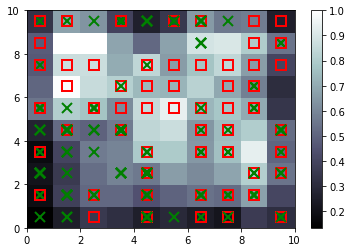

In [13]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
# blank map by bone()
bone()
# adding color to the map between 0 to 1
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    # get the winner neuron
    w = som.winner(x)
    # get the markers to the center of the cell so, add 0.5 to the coordinates of the neurons.
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
# Finding the frauds
# winning maps are the white blocks in the visualization plotted above. White blocs shows the potential fraud customers. 
# mappings are in the form of dictionary
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)

# mappings[(x,y)], here x & y are the coordinates of the white blocks in the winning maps.
# axis=0 will arrange the concatinated winning blocks one below other i.e. in vertical order.
frauds = np.concatenate((mappings[(1,6)], mappings[(5,5)], mappings[(1,7)], mappings[(2,7)], mappings[(4,3)], mappings[(4,5)], mappings[(4,7)], mappings[(6,8)], mappings[(7,7)], mappings[(8,2)], mappings[(8,8)]), axis = 0)

# get the original values in the dataset
frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(7, 3): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([3.60166420e-01, 1.00000000e+00, 1.32781955e-01, 5.35714286e-02,
       0.00000000e+00, 3.84615385e-01, 3.75000000e-01, 1.89473684e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 6.00000000e-02, 6.70000000e-04]), array([0.46368263, 1.        , 0.50496241, 0.23214286, 0.5       ,
       0.53846154, 0.375     , 0.03508772, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.00228   ]), array([0.8735269 , 1.        , 0.29819549, 0.00892857, 0.5       ,
       0.15384615, 0.5       , 0.14035088, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.21      , 0.        ]), array([0.59371959, 1.        , 0.06766917, 0.00589286, 0.5       ,
